<a href="https://colab.research.google.com/github/Kolexx/Data_asses/blob/main/Data_and_Decision_Making_Assessement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ecommerce_data = pd.read_csv('data.csv', encoding='Windows-1252')
ecommerce_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
print(ecommerce_data.isnull().sum())

InvoiceNo          0
StockCode          0
Description      299
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     34935
Country            1
dtype: int64


In [7]:
ecommerce_data = ecommerce_data.dropna(subset=['Description', 'CustomerID', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country'],  inplace= False)


In [8]:
print(ecommerce_data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [9]:
ecommerce_data.drop_duplicates()
ecommerce_data['year'] = pd.to_datetime(ecommerce_data['InvoiceDate']).dt.year
ecommerce_data['year'].head()


,year
0,2010
1,2010
2,2010
3,2010
4,2010


In [10]:
ecommerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
100222,544811,22625,RED KITCHEN SCALES,6,2/23/2011 15:53,8.50,12471.0,Germany,2011
100223,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2/23/2011 15:53,3.75,12471.0,Germany,2011
100224,544811,22741,FUNKY DIVA PEN,48,2/23/2011 15:53,0.85,12471.0,Germany,2011
100225,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2/23/2011 15:53,4.95,12471.0,Germany,2011


In [11]:
ecommerce_data['total_value'] = ecommerce_data['Quantity'] * ecommerce_data['UnitPrice']
median_unit_price = ecommerce_data['UnitPrice'].median()
median_quantity = ecommerce_data['Quantity'].median()
median_total_value = median_unit_price * median_quantity
ecommerce_data['HighValue'] = (ecommerce_data['total_value'] > median_total_value).astype(int)
ecommerce_data



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,total_value,HighValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1
...,...,...,...,...,...,...,...,...,...,...,...
100222,544811,22625,RED KITCHEN SCALES,6,2/23/2011 15:53,8.50,12471.0,Germany,2011,51.00,1
100223,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2/23/2011 15:53,3.75,12471.0,Germany,2011,45.00,1
100224,544811,22741,FUNKY DIVA PEN,48,2/23/2011 15:53,0.85,12471.0,Germany,2011,40.80,1
100225,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2/23/2011 15:53,4.95,12471.0,Germany,2011,29.70,1


In [12]:
ecommerce_data['year'] = pd.to_numeric(ecommerce_data['year'], errors='coerce').astype('Int64')
print(ecommerce_data['year'].dtype)

Int64


In [13]:
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID,year,total_value,HighValue
count,65312.000000,65312.000000,65312.000000,65312.0,65312.000000,65312.000000
mean,12.151151,3.279784,15351.562607,2010.588896,21.484623,0.623852
std,415.337597,10.607142,1768.838360,0.492038,435.106607,0.484422
min,-74215.000000,0.000000,12346.000000,2010.0,-77183.600000,0.000000
25%,2.000000,1.250000,13871.000000,2010.0,4.250000,0.000000
50%,4.000000,1.950000,15311.000000,2011.0,11.250000,1.000000
75%,12.000000,3.750000,16995.250000,2011.0,19.500000,1.000000
max,74215.000000,1715.850000,18283.000000,2011.0,77183.600000,1.000000


In [14]:
unique_countries = ecommerce_data['Country'].unique()
unique_countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates'], dtype=object)

In [83]:

from pandas_datareader import wb

In [16]:
GDP_growth = "NY.GDP.MKTP.KD.ZG"
Inflation_consumer_prices = 'FP.CPI.TOTL.ZG'
Consumer_price_index = 'FP.CPI.TOTL'

In [17]:
countries = ["GB", "FR", "AU", "NL", "DE", "NO", "IE", "CH", "ES", "PL", "PT", "IT", "BE", "LT", "JP", "IS", "GB", "DK", "CY", "SE", "AT", "IL", "FI", "BH", "GR", "HK", "SG", "LB", "AE", "SA", "CZ", "CA", "BR", "US", "MT", "ZA"
]

In [18]:
df1 = wb.download(indicator=GDP_growth, country=countries, start=2010, end=2023)
df2 = wb.download(indicator=Inflation_consumer_prices, country=countries, start=2010, end=2023)
df3 = wb.download(indicator=Consumer_price_index, country=countries, start=2010, end=2023)


In [19]:
# Reset index to move multi-index levels to columns
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)

# Rename the 'date' column to 'year'
df1.rename(columns={'date': 'year', GDP_growth: 'GDP_growth'}, inplace=True)
df2.rename(columns={'date': 'year', Inflation_consumer_prices: 'Inflation_consumer_prices'}, inplace=True)
df3.rename(columns={'date': 'year', Consumer_price_index: 'Consumer_price_index'}, inplace=True)



In [20]:
# Merge DataFrames on 'country' and 'year'
economic_indicators = pd.merge(df1, df2, on=['country', 'year'], how='outer')
economic_indicators = pd.merge(economic_indicators, df3, on=['country', 'year'], how='outer')

In [21]:
economic_indicators = economic_indicators.rename(columns={'country': 'Country'})
economic_indicators.head()

,Country,year,GDP_growth,Inflation_consumer_prices,Consumer_price_index
0,United Arab Emirates,2023,3.403857,NaN,NaN
1,United Arab Emirates,2022,7.850418,4.827889,117.541088
2,United Arab Emirates,2021,4.354755,-0.013860,112.127688
3,United Arab Emirates,2020,-4.957052,-2.079403,112.143231
4,United Arab Emirates,2019,1.108348,-1.931081,114.524661


In [84]:
economic_indicators = economic_indicators.dropna(subset=['Country', 'year', 'GDP_growth',	'Inflation_consumer_prices',	'Consumer_price_index'],  inplace= False)
# Convert 'year' to integer in both DataFrames
economic_indicators.loc[:, 'year'] = pd.to_numeric(economic_indicators['year']).astype('Int64')
print(economic_indicators['year'].dtype)



Int64


In [23]:
df = pd.merge(ecommerce_data, economic_indicators, on=['Country', 'year'], how='left')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,total_value,HighValue,GDP_growth,Inflation_consumer_prices,Consumer_price_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,15.30,1,2.238689,2.492655,100.000000
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1,2.238689,2.492655,100.000000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,22.00,1,2.238689,2.492655,100.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1,2.238689,2.492655,100.000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,20.34,1,2.238689,2.492655,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65307,544811,22625,RED KITCHEN SCALES,6,2/23/2011 15:53,8.50,12471.0,Germany,2011,51.00,1,3.925193,2.075173,102.075173
65308,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2/23/2011 15:53,3.75,12471.0,Germany,2011,45.00,1,3.925193,2.075173,102.075173
65309,544811,22741,FUNKY DIVA PEN,48,2/23/2011 15:53,0.85,12471.0,Germany,2011,40.80,1,3.925193,2.075173,102.075173
65310,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2/23/2011 15:53,4.95,12471.0,Germany,2011,29.70,1,3.925193,2.075173,102.075173


In [24]:
df = df.drop(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'year'], axis=1)

In [25]:
print(df.isnull().sum())

total_value                    0
HighValue                      0
GDP_growth                   957
Inflation_consumer_prices    957
Consumer_price_index         957
dtype: int64


In [26]:
df = df.dropna(subset=[ 'GDP_growth', 'Inflation_consumer_prices', 'Consumer_price_index'],  inplace= False)


In [27]:
print(df.isnull().sum())

total_value                  0
HighValue                    0
GDP_growth                   0
Inflation_consumer_prices    0
Consumer_price_index         0
dtype: int64


In [28]:
df.drop_duplicates()

,total_value,HighValue,GDP_growth,Inflation_consumer_prices,Consumer_price_index
0,15.30,1,2.238689,2.492655,100.000000
1,20.34,1,2.238689,2.492655,100.000000
2,22.00,1,2.238689,2.492655,100.000000
5,15.30,1,2.238689,2.492655,100.000000
6,25.50,1,2.238689,2.492655,100.000000
...,...,...,...,...,...
64834,-20.85,0,1.145102,3.856112,103.856112
64899,10.92,1,1.145102,3.856112,103.856112
65021,218.88,1,1.145102,3.856112,103.856112
65124,158.40,1,1.145102,3.856112,103.856112


In [29]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

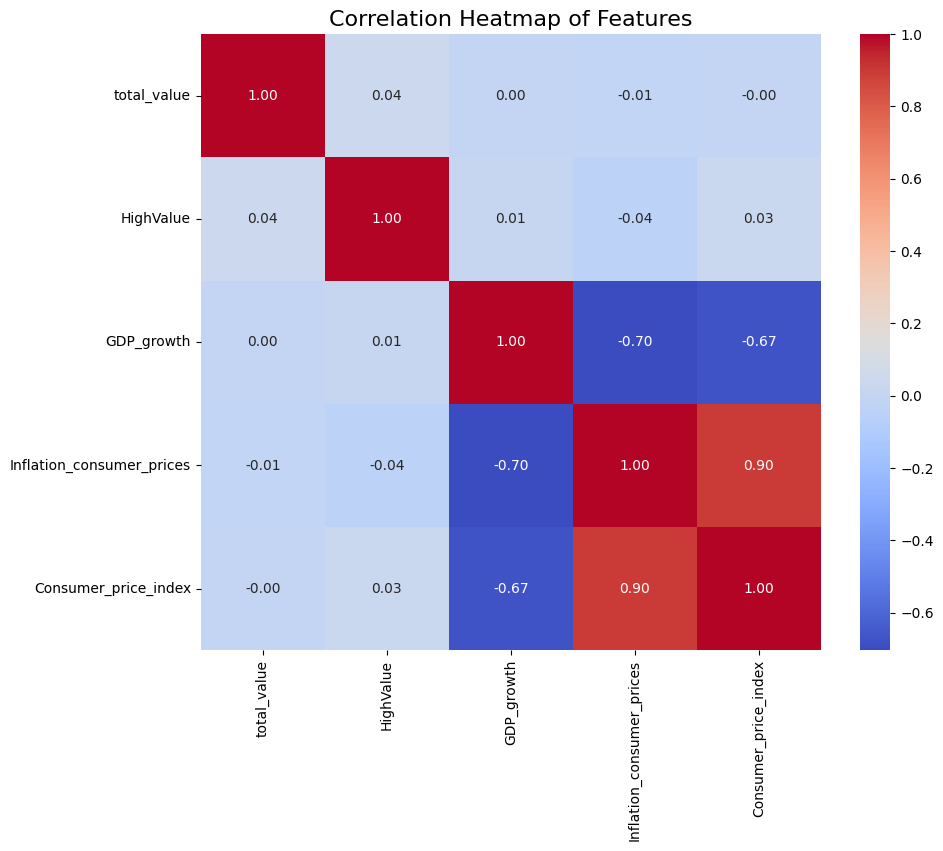

In [30]:
# Set the plot size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Heatmap of Features', fontsize=16)

# Show the plot
plt.show()


In [31]:
df.describe()

,total_value,HighValue,GDP_growth,Inflation_consumer_prices,Consumer_price_index
count,64355.000000,64355.000000,64355.000000,64355.000000,64355.000000
mean,21.145405,0.620232,1.661635,3.167651,102.171295
std,438.113648,0.485333,0.806050,0.785525,1.864830
min,-77183.600000,0.000000,-10.149315,-0.728243,99.727544
25%,4.250000,0.000000,1.145102,2.492655,100.000000
50%,10.980000,1.000000,1.145102,3.856112,103.856112
75%,19.500000,1.000000,2.238689,3.856112,103.856112
max,77183.600000,1.000000,6.216122,5.396731,105.247793


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Prepare features and target variable
features = ['GDP_growth', 'Inflation_consumer_prices', 'Consumer_price_index']
X = df[features]  # Feature data
y = df['HighValue']      # Target variable

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [37]:
# Initialize and train the model
linreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_predlinreg = linreg.predict(X_test_scaled)
mse_linreg = mean_squared_error(y_test, y_predlinreg)
r2_linreg = r2_score(y_test, y_predlinreg)

print(f"Linear Regression MSE: {mse_linreg}, R2: {r2_linreg}")


Linear Regression MSE: 0.2304231869886301, R2: 0.017945088192003356


In [38]:
linreg.predict([[2.238689, 2.492655, 100]])

array([16.35651147])

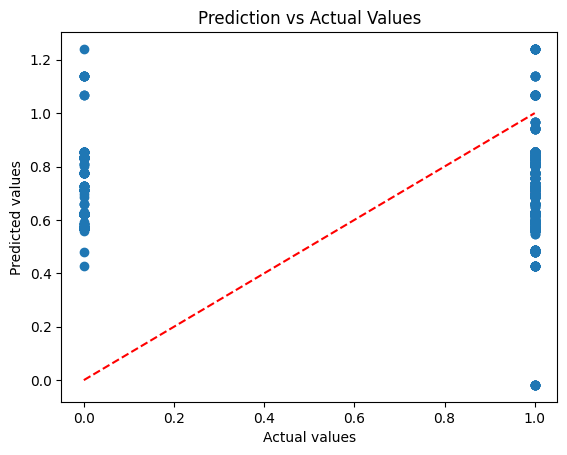

In [39]:
plt.scatter(y_test, y_predlinreg)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction vs Actual Values')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.show()

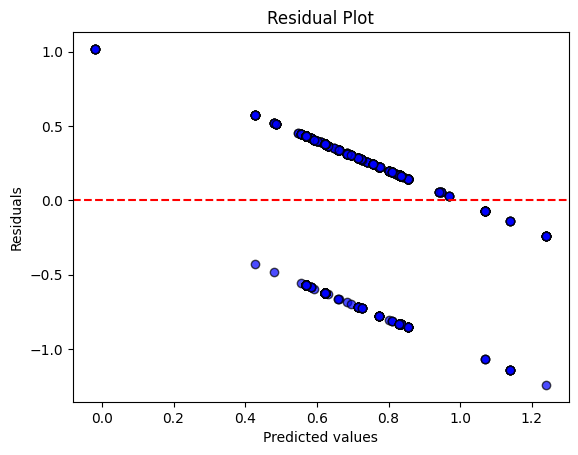

In [40]:
residuals = y_test - y_predlinreg
# plt.scatter(, residuals)
plt.scatter(y_predlinreg, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
# plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Figure size 640x480 with 0 Axes>

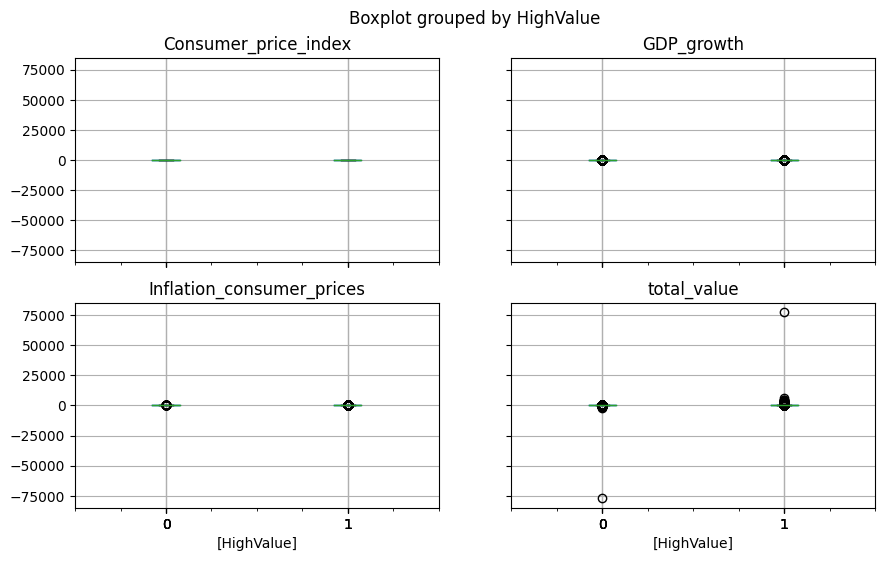

In [41]:
plt.figure()
df.boxplot(by='HighValue', figsize=(10, 6))
plt.show()

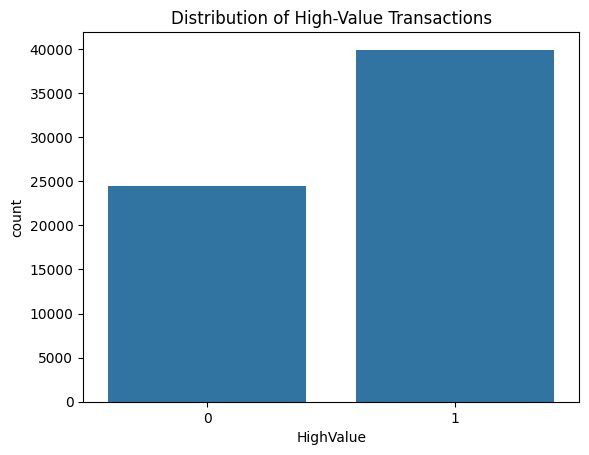

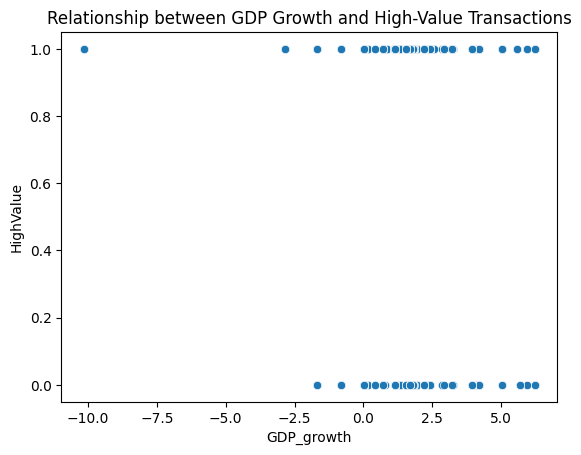

In [42]:
# Plot the distribution of the target variable
sns.countplot(x='HighValue', data=df)
plt.title('Distribution of High-Value Transactions')
plt.show()

# Plot the relationship between GDP growth and high-value transactions
sns.scatterplot(x='GDP_growth', y='HighValue', data=df)
plt.title('Relationship between GDP Growth and High-Value Transactions')
plt.show()


In [43]:
df.groupby('HighValue').size()

,0
HighValue,
0,24440
1,39915


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("KNeighborsClassifier accu imported")

KNeighborsClassifier accu imported


In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [86]:
y_pred_knn = knn.predict([[5.1, 3.5, 1.4]])
y_pred_knn

array([1])

In [67]:
knn.fit(X, np.ravel(y))
y_pred_knn5 = knn.predict(X)
metrics.accuracy_score(y, y_pred_knn5)

0.5915624271618367

In [68]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, np.ravel(y))
y_pred_knn15 = knn.predict(X)
metrics.accuracy_score(y, y_pred_knn15)

0.6013829539274338

In [69]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, np.ravel(y))
y_pred_knn1= knn.predict(X)
metrics.accuracy_score(y, y_pred_knn1)

0.5979333385129361

In [89]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn5 = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_knn5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.6185222593427084

In [71]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
y_pred_knn15 = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_knn15)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.623960842203403

In [90]:
# Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_knn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

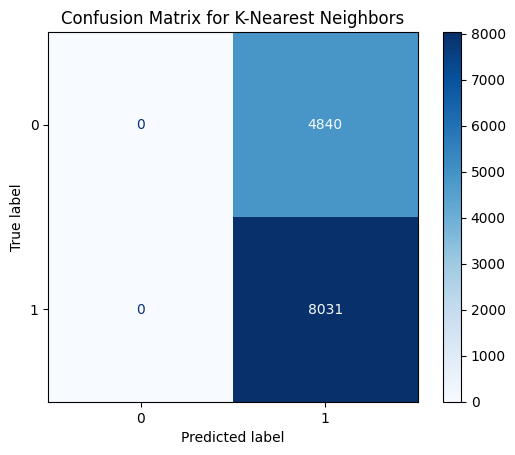

In [82]:
# Ensure y_pred_knn is a 1D array
if len(y_pred_knn.shape) > 1 and y_pred_knn.shape[1] == 3:
    y_pred_knn = np.argmax(y_pred_knn, axis=1)

# Calculate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


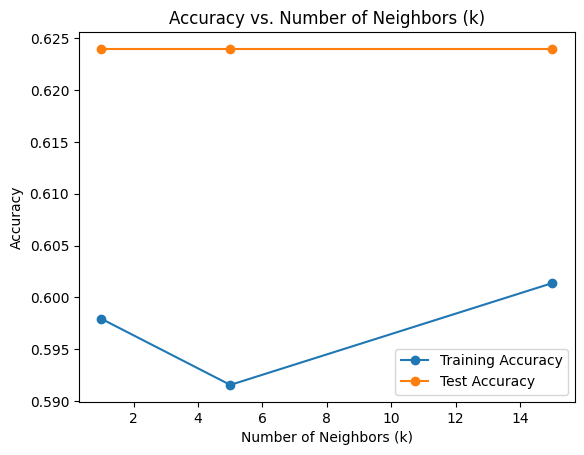

In [62]:
import matplotlib.pyplot as plt

k_values = [1, 5, 15]
train_accuracies = [accuracy_score(y, KNeighborsClassifier(n_neighbors=k).fit(X, np.ravel(y)).predict(X)) for k in k_values]
test_accuracies = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train).predict(X_test)) for k in k_values]

plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


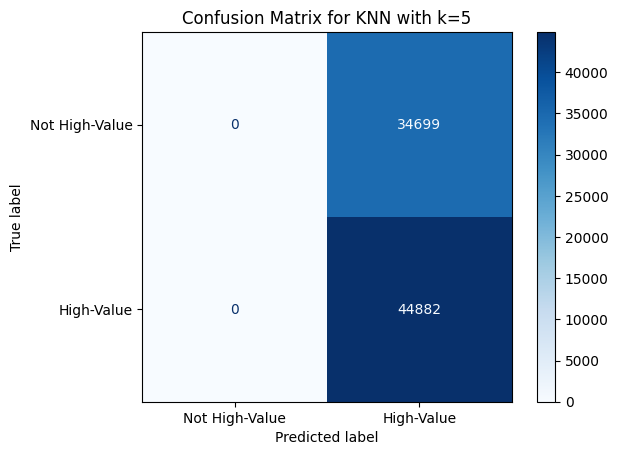

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train_scaled, y_train)
y_pred_best_knn = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not High-Value', 'High-Value'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN with k=5')
plt.show()


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("LogisticRegression, confusion_matrix and ConfusionMatrixDisplay imported")

LogisticRegression, confusion_matrix and ConfusionMatrixDisplay imported


In [48]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X, y)

LogisticRegression(max_iter=200)

In [49]:
logreg.predict([[5.1, 3.5, 1.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [50]:
y_pred = logreg.predict(X)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
metrics.accuracy_score(y, y_pred)

0.6178851682075984

In [52]:
y_pred_test = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test)

0.6209307746095875

In [56]:
cm_logistic = confusion_matrix(y_test, y_pred_test)


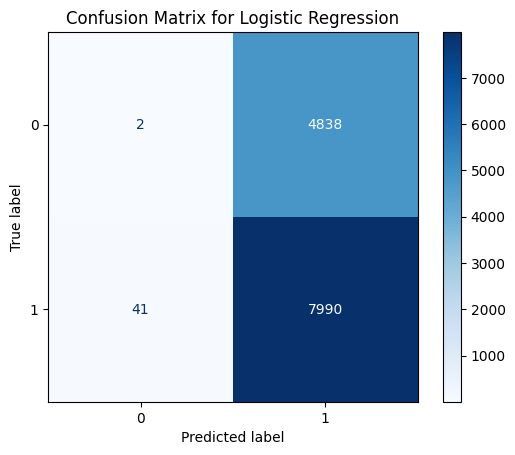

In [91]:
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=logreg.classes_)
disp_logistic.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

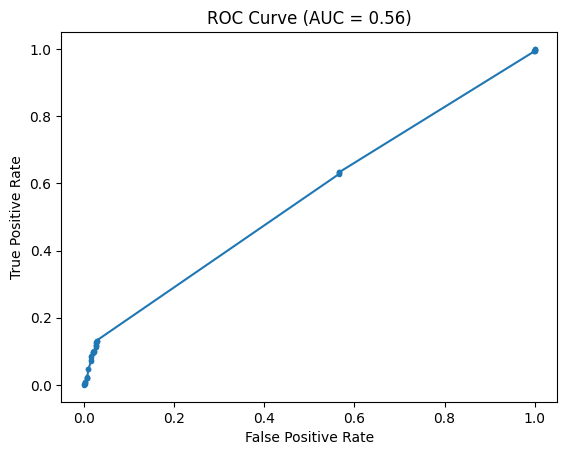

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.2f})')
plt.show()


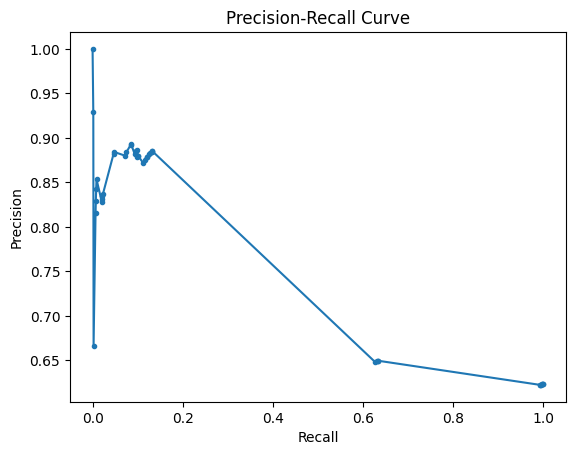

In [55]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train))
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

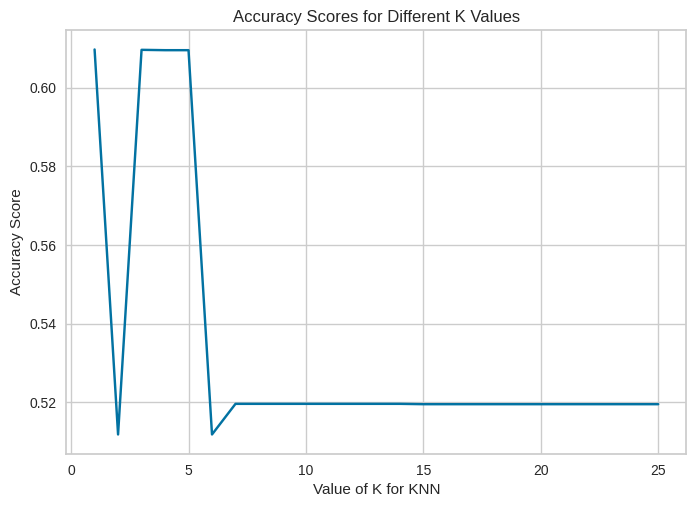

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different K Values')
plt.show()